# Modelo 1 Tabela Stress

## importações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

## Leitura do CSV e informações da tabela

In [7]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sleep Quality                        520 non-null    int64
 1   suffer headaches                     520 non-null    int64
 2   academic performance                 520 non-null    int64
 3   study load                           520 non-null    int64
 4   practice extracurricular activities  520 non-null    int64
 5   stress levels                        520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [9]:
data.head()

,Sleep Quality,suffer headaches,academic performance,study load,practice extracurricular activities,stress levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [10]:
data.columns

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')

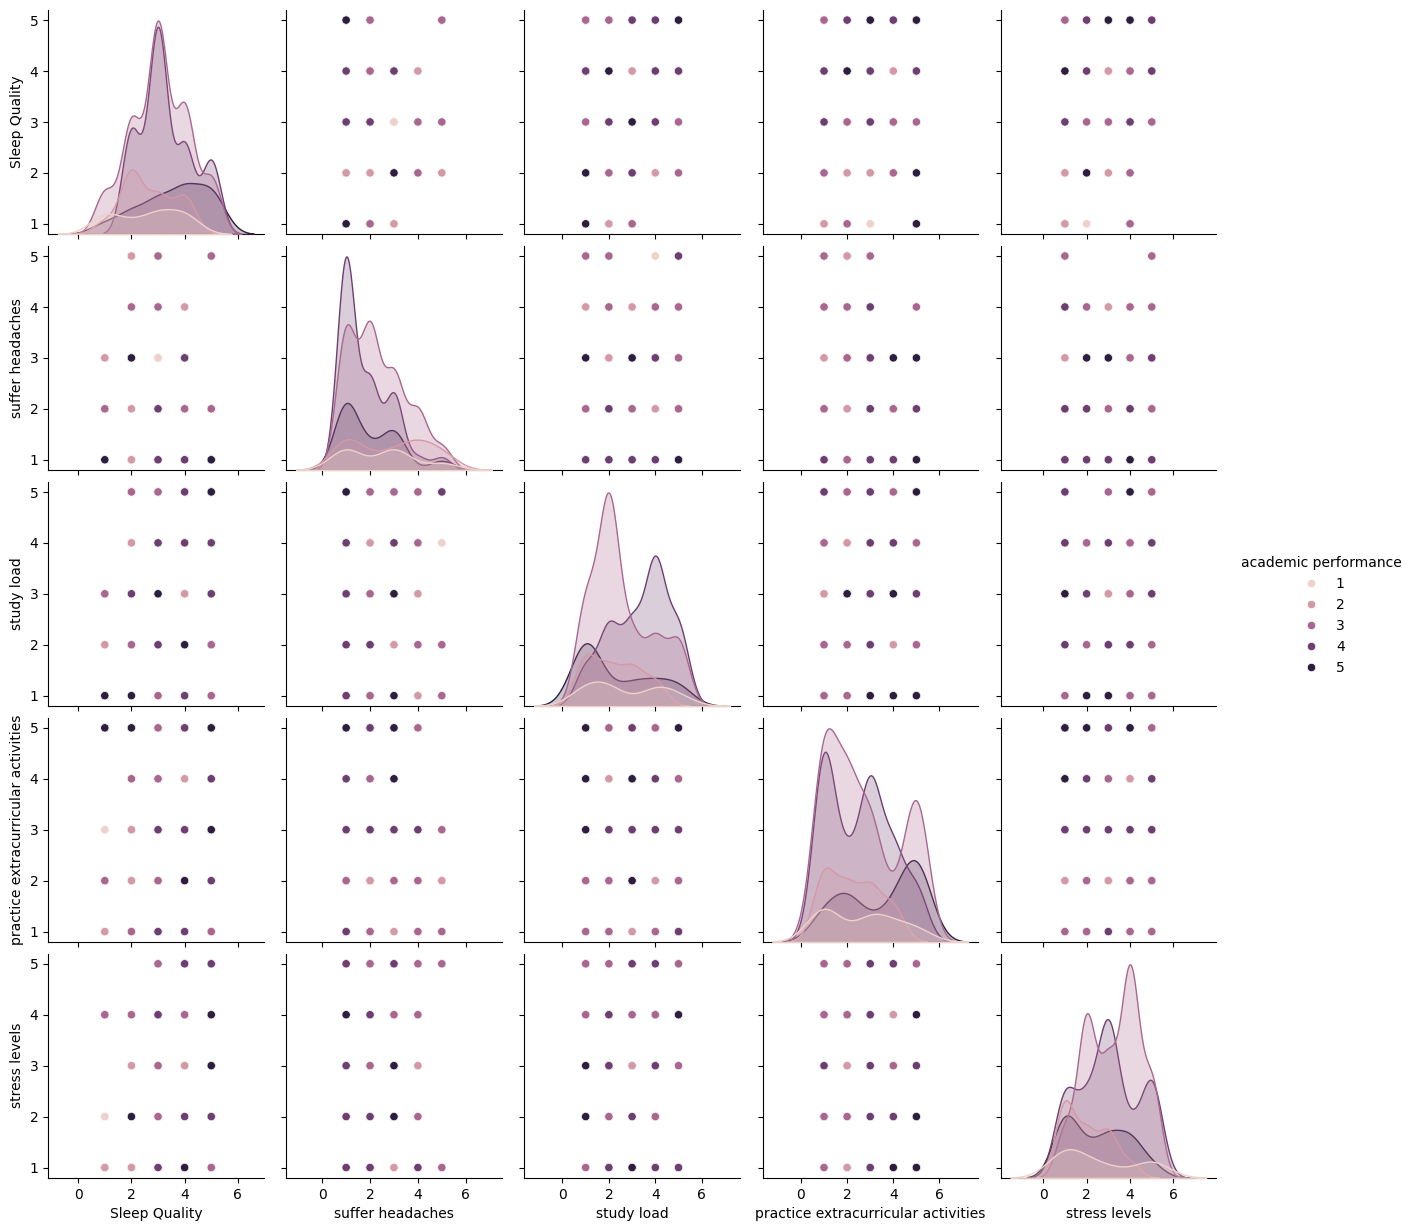

In [11]:
sns.pairplot(data, hue='academic performance')

## Codigo

### New dataframe

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(data.drop('academic performance', axis=1))

StandardScaler()

In [14]:
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))

In [15]:
df_normalizado

array([[-0.1138469 , -0.94899385,  0.91170283, -0.46462824,  0.09214761],
       [ 0.7969283 , -0.94899385,  0.18234057,  0.21595397, -0.64503328],
       [-1.0246221 , -0.94899385, -1.27638396,  0.89653619,  0.8293285 ],
       ...,
       [-1.0246221 ,  0.65580876, -1.27638396,  1.57711841, -0.64503328],
       [-0.1138469 ,  1.45821006,  1.64106509, -0.46462824,  1.56650939],
       [ 1.7077035 , -0.94899385,  1.64106509,  1.57711841,  0.8293285 ]])

In [16]:
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

In [17]:
df_param

,Sleep Quality,suffer headaches,study load,practice extracurricular activities,stress levels
0,-0.113847,-0.948994,0.911703,-0.464628,0.092148
1,0.796928,-0.948994,0.182341,0.215954,-0.645033
2,-1.024622,-0.948994,-1.276384,0.896536,0.829329
3,-0.113847,-0.146593,-0.547022,0.215954,0.092148
4,-1.024622,0.655809,1.641065,1.577118,0.092148
...,...,...,...,...,...
515,-0.113847,-0.146593,-0.547022,0.215954,-1.382214
516,-1.024622,1.458210,-0.547022,-1.145210,-0.645033
517,-1.024622,0.655809,-1.276384,1.577118,-0.645033
518,-0.113847,1.458210,1.641065,-0.464628,1.566509


In [18]:
df_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sleep Quality                        520 non-null    float64
 1   suffer headaches                     520 non-null    float64
 2   study load                           520 non-null    float64
 3   practice extracurricular activities  520 non-null    float64
 4   stress levels                        520 non-null    float64
dtypes: float64(5)
memory usage: 20.4 KB


### KNN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



In [24]:
print(confusion_matrix(y_test,pred))

[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

In [26]:
error_rate

[0.023076923076923078,
 0.023076923076923078,
 0.023076923076923078,
 0.046153846153846156,
 0.14615384615384616,
 0.2846153846153846,
 0.3384615384615385,
 0.35384615384615387,
 0.36153846153846153,
 0.3230769230769231,
 0.2846153846153846,
 0.2923076923076923,
 0.36923076923076925,
 0.36153846153846153,
 0.38461538461538464,
 0.4076923076923077,
 0.4307692307692308,
 0.4307692307692308,
 0.4230769230769231,
 0.4461538461538462,
 0.45384615384615384,
 0.43846153846153846,
 0.5076923076923077,
 0.5384615384615384,
 0.5538461538461539,
 0.5692307692307692,
 0.5846153846153846,
 0.5615384615384615,
 0.5769230769230769,
 0.5384615384615384,
 0.6,
 0.6230769230769231,
 0.6153846153846154,
 0.6076923076923076,
 0.6307692307692307,
 0.6,
 0.5846153846153846,
 0.5923076923076923,
 0.5846153846153846]

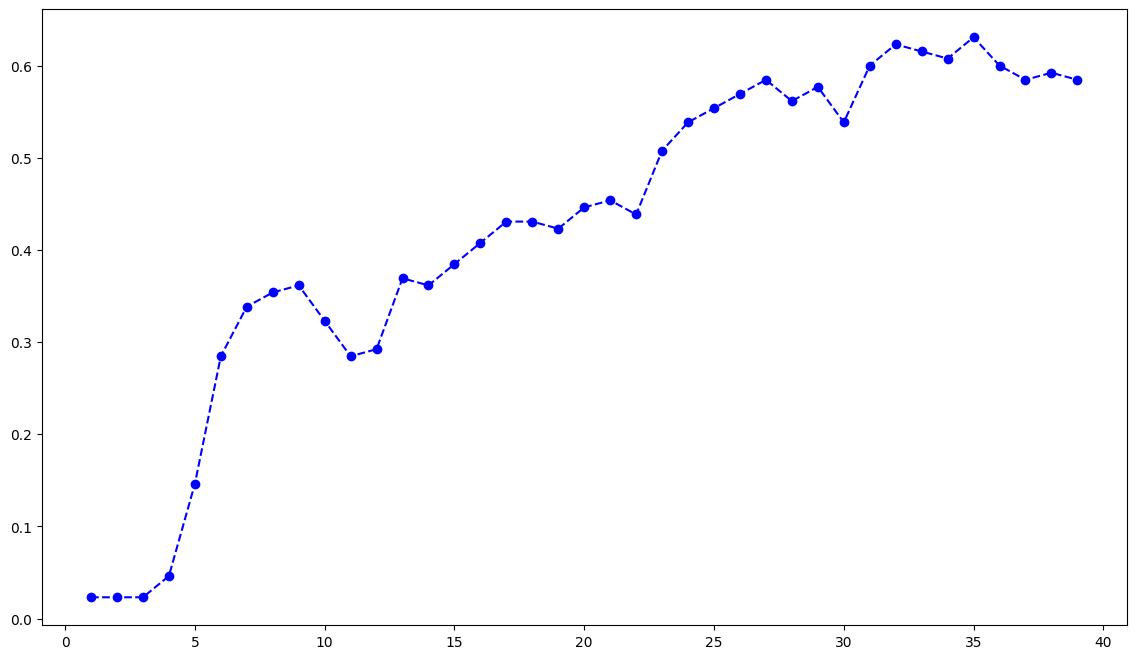

In [27]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [29]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


### Grafico

# Modelo 1 Tabela Performace

## Leitura do CSV e importações

In [34]:
data2 = pd.read_csv("..\\assets\\data\\performance_data_converted_por_faixas.csv")

In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Extracurricular Activities        10000 non-null  bool 
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: bool(1), int64(4)
memory usage: 322.4 KB


In [36]:
data2.head()

,Hours Studied,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,4,True,5,1,5
1,2,False,1,2,4
2,4,True,4,2,3
3,3,True,2,2,2
4,4,False,5,3,4


In [37]:
data2.columns

Index(['Hours Studied', 'Extracurricular Activities', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

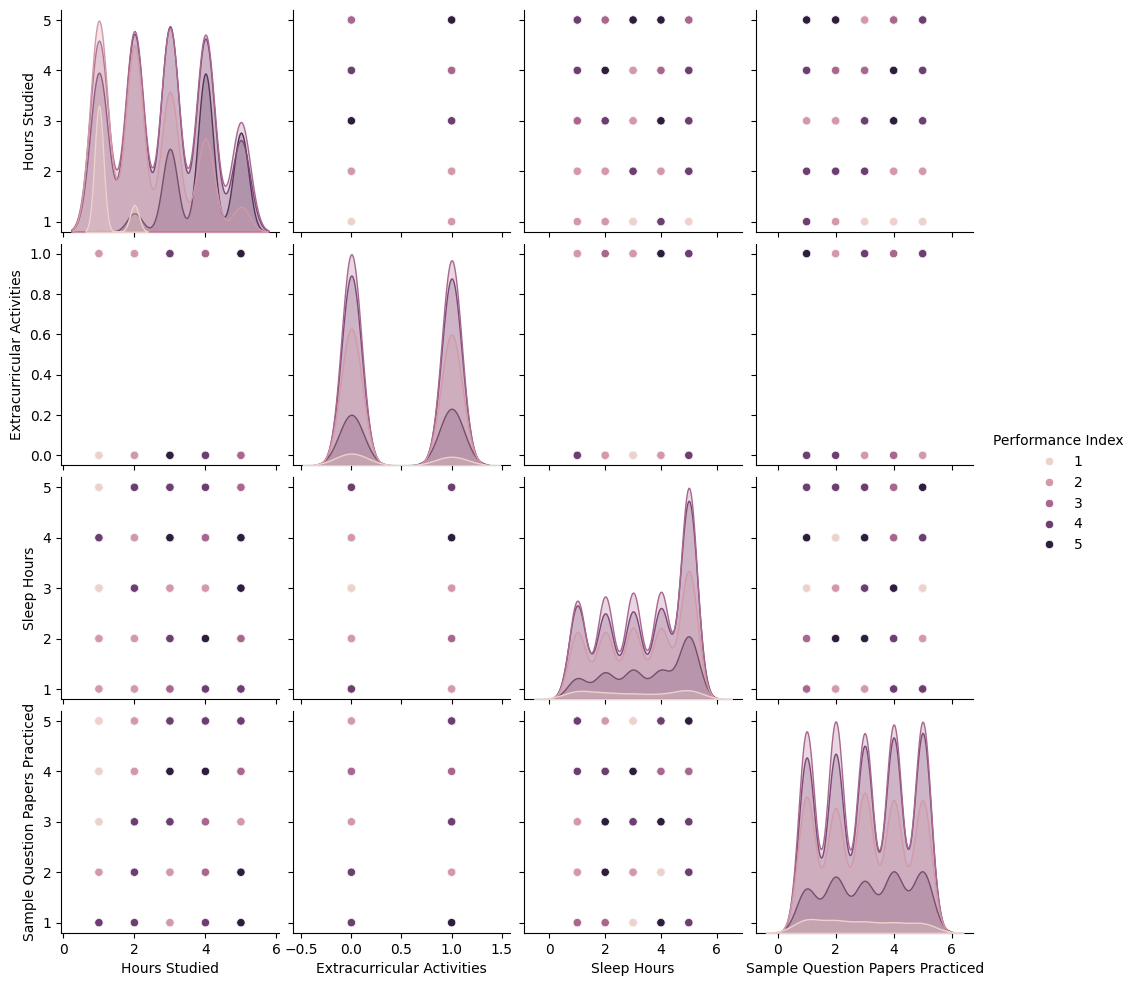

In [39]:
sns.pairplot(data2, hue='Performance Index')

<Axes: >

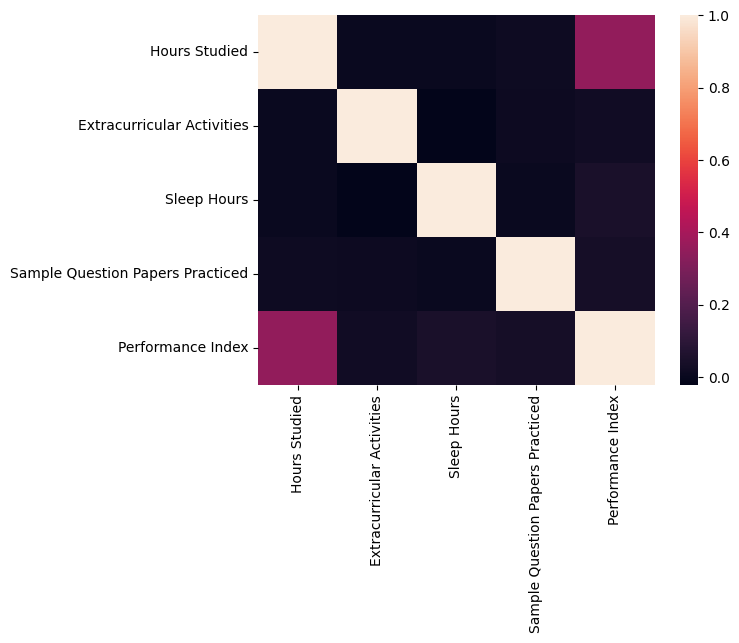

In [44]:
sns.heatmap(data2.corr())

## Codigo

### New DataFrame

In [118]:
scaler2 = StandardScaler()
scaler2.fit(data2.drop('Performance Index', axis=1))

StandardScaler()

In [119]:
df2_normalizado = scaler2.transform(data2.drop('Performance Index', axis=1))

In [120]:
df2_normalizado

array([[ 0.9290666 ,  1.01045465,  1.0974134 , -1.44012328],
       [-0.59013314, -0.98965352, -1.59298474, -0.73338368],
       [ 0.9290666 ,  1.01045465,  0.42481387, -0.73338368],
       ...,
       [ 0.16946673,  1.01045465,  1.0974134 , -0.02664408],
       [ 1.68866647,  1.01045465,  0.42481387, -1.44012328],
       [ 0.9290666 , -0.98965352,  1.0974134 , -1.44012328]])

In [121]:
df2_param = pd.DataFrame(df2_normalizado, columns=data2.drop('Performance Index', axis=1).columns)

In [122]:
df2_param.head()

,Hours Studied,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.929067,1.010455,1.097413,-1.440123
1,-0.590133,-0.989654,-1.592985,-0.733384
2,0.929067,1.010455,0.424814,-0.733384
3,0.169467,1.010455,-0.920385,-0.733384
4,0.929067,-0.989654,1.097413,-0.026644


In [123]:
df2_param.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Extracurricular Activities        10000 non-null  float64
 2   Sleep Hours                       10000 non-null  float64
 3   Sample Question Papers Practiced  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


### KNN

In [125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2_param, data2['Performance Index'], test_size=0.30)

In [126]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [134]:
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 21,
 'p': 2,
 'weights': 'uniform'}

In [127]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       0.08      0.05      0.06        88
           2       0.25      0.22      0.24       685
           3       0.32      0.30      0.31       989
           4       0.29      0.34      0.31       916
           5       0.22      0.26      0.24       322

    accuracy                           0.28      3000
   macro avg       0.23      0.23      0.23      3000
weighted avg       0.28      0.28      0.28      3000



[[  4  31  29  24   0]
 [ 17 154 204 252  58]
 [ 17 193 292 369 118]
 [ 12 203 275 307 119]
 [  0  26 121  91  84]]


In [128]:
error_rate2 = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train, y2_train)
    pred2 = knn2.predict(X2_test)
    error_rate2.append(np.mean(pred2!=y2_test))

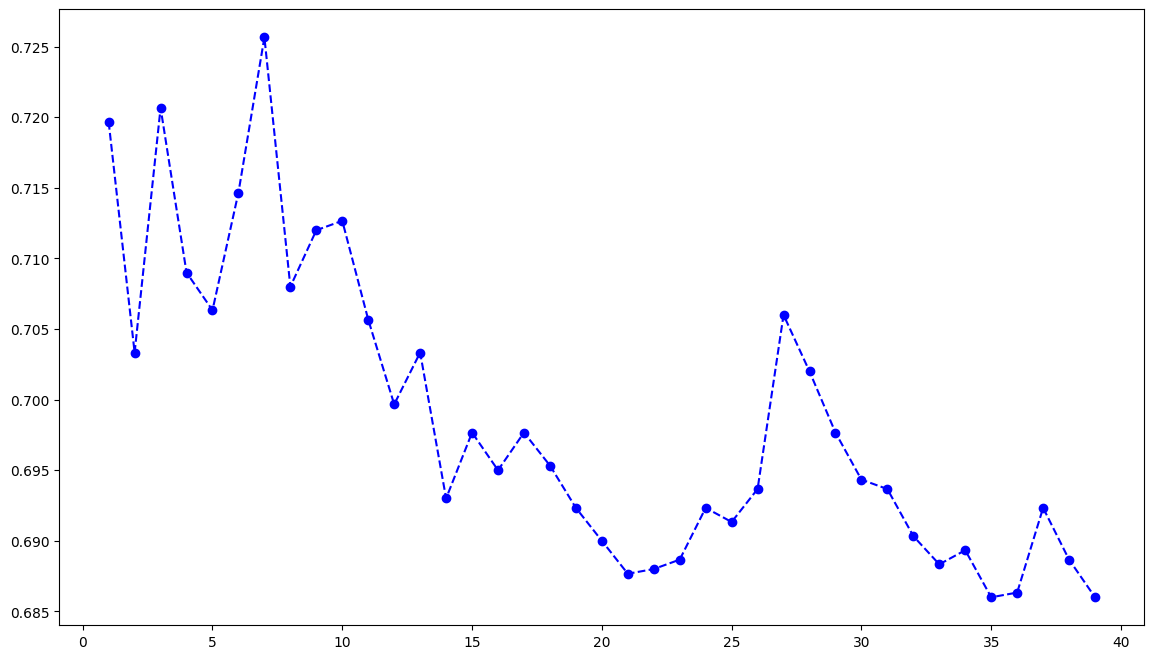

In [129]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate2, color='blue', linestyle='dashed', marker='o')

In [130]:
knn2 = KNeighborsClassifier(n_neighbors=21)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)

In [131]:
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        88
           2       0.26      0.27      0.27       685
           3       0.33      0.45      0.38       989
           4       0.33      0.29      0.31       916
           5       0.31      0.10      0.15       322

    accuracy                           0.31      3000
   macro avg       0.25      0.22      0.22      3000
weighted avg       0.30      0.31      0.30      3000



[[  0  47  25  16   0]
 [  0 187 296 191  11]
 [  0 246 449 257  37]
 [  0 209 413 268  26]
 [  0  20 185  84  33]]


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati